In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
healthcare = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/healthcare.csv')
print(healthcare.head(3))

                             DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   

    Total Discharges    Average Covered Charges    Average Total Payments   \
0                  91                   32963.07   

We’re going to focus on only the ways in which hospitals charge patients for chest pain. But you could do this for any of the diagnoses in our dataset. 

In [9]:
print(healthcare['DRG Definition'].unique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '069 - TRANSIENT ISCHEMIA'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '149 - DYSEQUILIBRIUM'
 '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC'
 '207 - RESPIRAT

In [11]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

In [15]:
#Chest pain diagnosis in Alabama
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == 'AL']
print(alabama_chest_pain.head(3))

         DRG Definition  Provider Id                     Provider Name  \
82205  313 - CHEST PAIN        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
82206  313 - CHEST PAIN        10006    ELIZA COFFEE MEMORIAL HOSPITAL   
82207  313 - CHEST PAIN        10007          MIZELL MEMORIAL HOSPITAL   

      Provider Street Address Provider City Provider State  Provider Zip Code  \
82205  1108 ROSS CLARK CIRCLE        DOTHAN             AL              36301   
82206      205 MARENGO STREET      FLORENCE             AL              35631   
82207           702 N MAIN ST           OPP             AL              36467   

      Hospital Referral Region Description   Total Discharges   \
82205                          AL - Dothan                  36   
82206                      AL - Birmingham                  13   
82207                          AL - Dothan                  34   

        Average Covered Charges    Average Total Payments   \
82205                   19540.55                   

We now have all of the hospitals in Alabama that have a diagnosed chest pain. We now want to find the average cost of those diagnoses. These value is stored in the column ' Average Covered Charges '

In [16]:
costs = alabama_chest_pain[' Average Covered Charges '].values

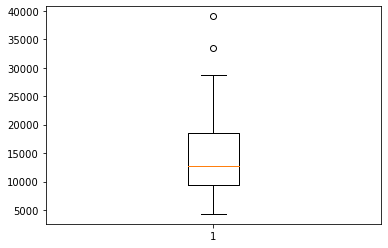

In [17]:
#Boxplot of the costs
plt.boxplot(costs)
plt.show()

In [18]:
#Looking at the unique Provider states 
states = chest_pain['Provider State'].unique()


datasets = []
for state in states:
  datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

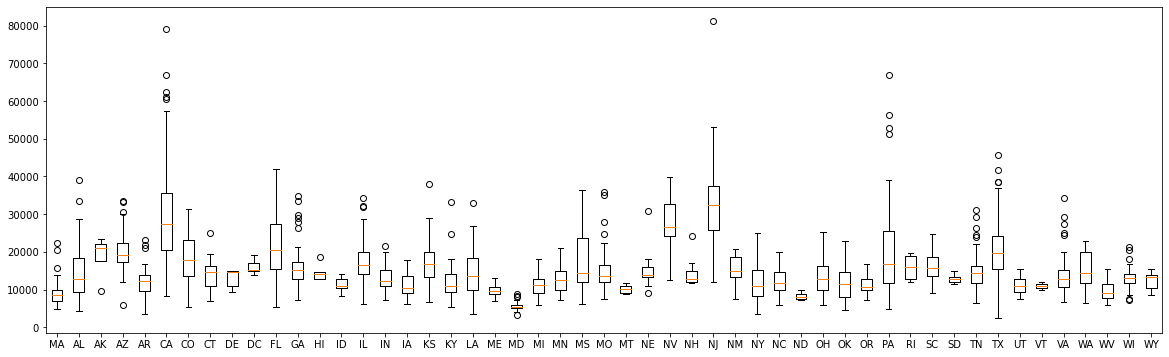

In [21]:
plt.figure(figsize=(20,6))
plt.boxplot(datasets, labels = states)
plt.show()